In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
from datetime import timedelta

In [41]:
position_path = "./Data/2020-09-29/"
data_path = "./Data/2020-09-29/CR6Data/"
output_path ="./"

df_pos = pd.read_excel(position_path+"FullTestRun_1.xlsx", header=None, columns=[])
df_pos.columns = ['TIMESTAMP', 'X', 'Y', 'THETA']

# Create proper timestamps for position
dict ={}
for i in tqdm(range(len(df_pos))):
    dict[i]={'TIMESTAMP': datetime.fromordinal(int(df_pos['TIMESTAMP'][i])) + timedelta(days=df_pos['TIMESTAMP'][i]%1) - timedelta(days = 366),'X':df_pos['X'][i],'Y':df_pos['Y'][i],'THETA':df_pos['THETA'][i]}
df_pos = pd.DataFrame.from_dict(dict, "index")


# Create single CR6 dataframe with datetime for comparisons
dict={}
for i in tqdm(range(5350,5382)): #create dataframe of all CR6 data
    outputsize = len(dict)
    
    df_CR6 = pd.read_table(data_path+"Younng10Hz"+str(i)+".dat",
                       sep=",",
                      skiprows=[0,2,3])

    for j in range(len(df_CR6)):
        if "." in df_CR6['TIMESTAMP'][j]:
            date = datetime.strptime(df_CR6['TIMESTAMP'][j], '%Y-%m-%d %H:%M:%S.%f')
            #print(date)
        else:
            date = datetime.strptime(df_CR6['TIMESTAMP'][j], '%Y-%m-%d %H:%M:%S')
            
        #dict[outputsize+j]={"Year":date.year,"Month":date.month,"Day":date.day,"Hour":date.hour,"Minute":date.minute,"Second":date.second+date.microsecond/1000000.,"Record":df_CR6['RECORD'][j],"U (m s^-1)":df_CR6['U'][j],"V (m s^-1)":df_CR6['V'][j],"W (m s^-1)":df_CR6['W'][j],"TSonic (K)":df_CR6['TSonic'][j],"RH (%)":df_CR6['RH'][j],"T_HMP60 (C)":df_CR6['T_HMP60'][j]}
        dict[outputsize+j]={"TIMESTAMP":date,"Record":df_CR6['RECORD'][j],"U (m s^-1)":df_CR6['U'][j],"V (m s^-1)":df_CR6['V'][j],"W (m s^-1)":df_CR6['W'][j],"TSonic (K)":df_CR6['TSonic'][j],"RH (%)":df_CR6['RH'][j],"T_HMP60 (C)":df_CR6['T_HMP60'][j]}    
            
        #output.loc[outputsize+j,output.columns]=[date.year,date.month,date.day,date.hour,date.minute,date.second+date.microsecond,df_CR6['RECORD'][j],df_CR6['U'][j],df_CR6['V'][j],df_CR6['W'][j],df_CR6['TSonic'][j],df_CR6['RH'][j],df_CR6['T_HMP60'][j]]
        #output = output.append(pd.Series([date.year,date.month,date.day,date.hour,date.minute,date.second+date.microsecond/1000000.,df_CR6['RECORD'][j],df_CR6['U'][j],df_CR6['V'][j],df_CR6['W'][j],df_CR6['TSonic'][j],df_CR6['RH'][j],df_CR6['T_HMP60'][j]], index=output.columns ), ignore_index=True)
    
df_CR6 = pd.DataFrame.from_dict(dict, "index")


#output.to_csv(output_path,index=False)

df_CR6

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 18.62it/s]


,TIMESTAMP,Record,U (m s^-1),V (m s^-1),W (m s^-1),TSonic (K),RH (%),T_HMP60 (C)
0,2020-09-29 11:35:27.600,3226200,-0.018,-0.002,0.015,298.4,43.84,23.18
1,2020-09-29 11:35:27.700,3226201,-0.018,-0.002,0.015,298.4,43.84,23.18
2,2020-09-29 11:35:27.800,3226202,-0.018,-0.002,0.015,298.4,43.84,23.18
3,2020-09-29 11:35:27.900,3226203,-0.018,-0.002,0.015,298.4,43.84,23.18
4,2020-09-29 11:35:28.000,3226204,-0.018,-0.002,0.015,298.4,43.84,23.18
...,...,...,...,...,...,...,...,...
19195,2020-09-29 12:07:42.300,3245395,-0.048,-0.032,0.064,297.1,43.06,23.34
19196,2020-09-29 12:07:42.400,3245396,-0.130,-0.081,0.063,297.1,43.06,23.34
19197,2020-09-29 12:07:42.500,3245397,-0.131,-0.081,0.063,297.1,43.06,23.34
19198,2020-09-29 12:07:42.600,3245398,-0.131,-0.081,0.063,297.1,43.06,23.34


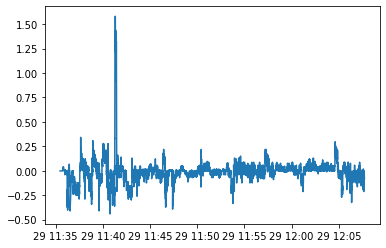

In [43]:
#Trim

plt.plot(df_CR6['TIMESTAMP'],df_CR6['V (m s^-1)'])
plt.show()








output = pd.DataFrame(columns = ["Year","Month","Day","Hour","Minute","Second","x","y","theta","Record","U (m s^-1)","V (m s^-1)","W (m s^-1)","TSonic (K)","RH (%)","T_HMP60 (C)"])

In [37]:
df_pos

,TIMESTAMP,X,Y,THETA
0,2020-09-29 11:42:26.820981,9.910000,0.770000,0
1,2020-09-29 11:42:26.834027,9.906667,0.766667,0
2,2020-09-29 11:42:26.855974,9.903333,0.763333,0
3,2020-09-29 11:42:26.871001,9.900000,0.760000,0
4,2020-09-29 11:42:26.893984,9.896667,0.756667,0
...,...,...,...,...
86823,2020-09-29 12:11:49.850042,4.900000,11.800000,0
86824,2020-09-29 12:11:49.870008,4.900000,11.800000,0
86825,2020-09-29 12:11:49.891000,4.900000,11.800000,0
86826,2020-09-29 12:11:49.910010,4.900000,11.800000,0
